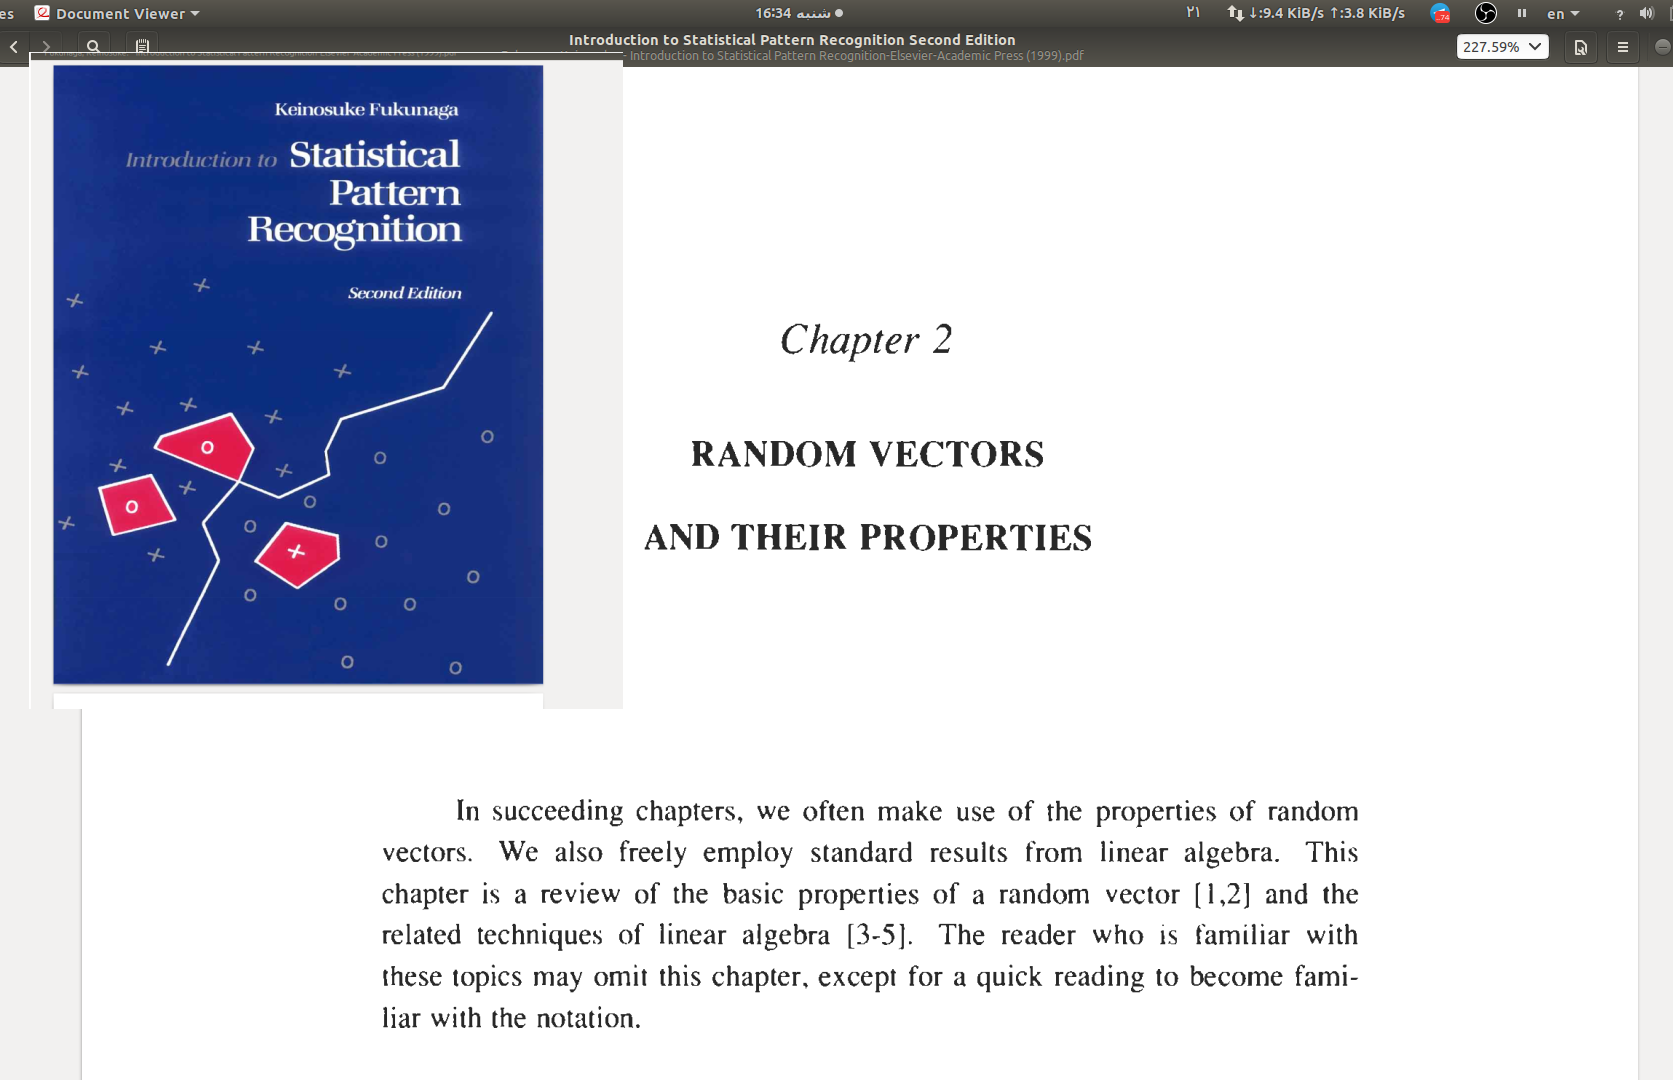

https://medium.com/analytics-vidhya/gaussian-mixture-models-with-tensorflow-probability-125315891c22

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

In [ ]:
!pip install drawnow

In [ ]:
# import matplotlib.pyplot as plt
# from drawnow import drawnow
# import numpy as np

# def makeFig():
#     plt.scatter(xList,yList) # I think you meant this

# plt.ion() # enable interactivity
# fig=plt.figure() # make a figure

# xList=list()
# yList=list()

# for i in np.arange(50):
#     y=np.random.random()
#     xList.append(i)
#     yList.append(y)
#     drawnow(makeFig)
#     #makeFig()      The drawnow(makeFig) command can be replaced
#     #plt.draw()     with makeFig(); plt.draw()
#     plt.pause(0.001)

**Statistics**

The statistics required are: mean, covariance, diagonal, and standard deviation. We first generate X, a 2D array, then use the Numpy methods to compare statistics against the parameters used.


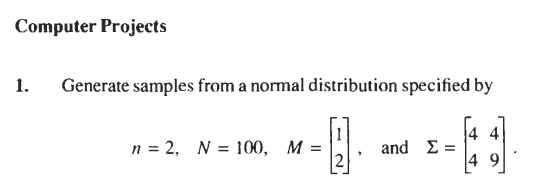

In [31]:
np.random.seed(0)  # random seed dont change  :https://stackoverflow.com/questions/3543833/how-do-i-clear-all-variables-in-the-middle-of-a-python-script
mu = [1,2]
cov = [[4,4],
       [4,9]]
X = np.random.multivariate_normal(mu, cov, size=100)
X_mean = np.mean(X, axis=0)
X_cov = np.cov(X, rowvar=0)
X_diag = np.diag(X_cov)
X_stddev = np.sqrt(X_diag)


2. Plot the generated samples.
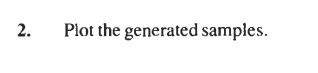

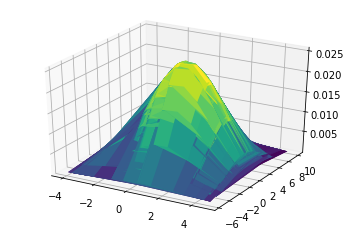

In [32]:
# Due to deprecated MultivariateNormalFullCovariance
mvn = tfd.MultivariateNormalDiag(
 loc=X_mean,
 scale_diag=X_stddev)
mvn_mean = mvn.mean().numpy()
mvn_cov = mvn.covariance().numpy()
mvn_stddev = mvn.stddev().numpy()

x1, x2 = np.meshgrid(X[:,0], X[:,1])
data = np.stack((x1.flatten(), x2.flatten()), axis=1)
prob = mvn.prob(data).numpy()
ax = plt.axes(projection='3d')
ax.plot_surface(x1, x2, prob.reshape(x1.shape), cmap='viridis')
plt.show()

3. Compute[ the sample mean, M, and sample covariance matrix](hhttps://en.wikipedia.org/wiki/Sample_mean_and_covariance).

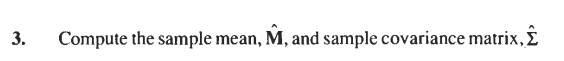

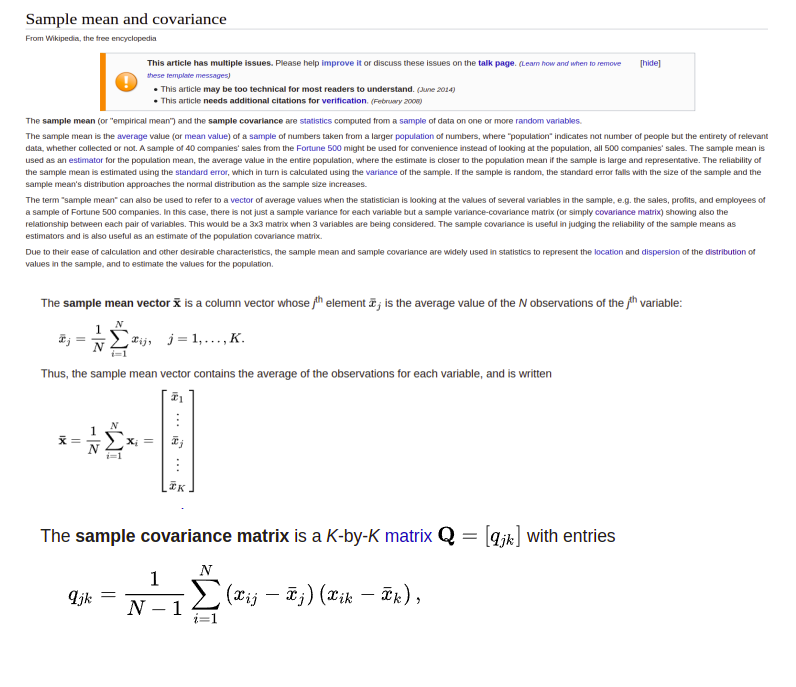

In [68]:
np.random.seed(0)  # random seed
mu = [1,2]
cov = [[4,4],
       [4,9]]
X = np.random.multivariate_normal(mu, cov, size=100)
X_mean = np.mean(X, axis=0)
X_cov = np.cov(X, rowvar=0)
print ('\n\n Sample mean of X which has been made by random.multivariate_normal function is : \n'+str(mvn_mean))
print ('\n\n Sample Covariance of X is : \n'+str(mvn_cov))



 Sample mean of X which has been made by random.multivariate_normal function is : 
[0.834803  2.0952272]


 Sample Covariance of X is : 
[[4.10708256 0.        ]
 [0.         9.58469047]]


**4.Repeat 1 and 3, 10 times. Compute the sample mean and sample variance
for each component of M and C over 10 trials.**

![enter image description here](https://i.stack.imgur.com/8zcbu.png)


In [ ]:
def do_it_loop(loop_1):
  np.random.seed(loop_1)  # random seed dont change  :https://stackoverflow.com/questions/3543833/how-do-i-clear-all-variables-in-the-middle-of-a-python-script
  mu = [1,2]
  cov = [[4,4],
         [4,9]]
  X = np.random.multivariate_normal(mu, cov, size=100)
  X_mean = np.mean(X, axis=0)
  X_cov = np.cov(X, rowvar=0)
  X_diag = np.diag(X_cov)
  X_stddev = np.sqrt(X_diag)


  # Due to deprecated MultivariateNormalFullCovariance
  mvn = tfd.MultivariateNormalDiag(
  loc=X_mean,
  scale_diag=X_stddev)
  mvn_mean = mvn.mean().numpy()
  mvn_cov = mvn.covariance().numpy()
  mvn_stddev = mvn.stddev().numpy()

  print ('\n\n Sample mean of X which has been made by random.multivariate_normal function is : \n\n'+str(mvn_mean))
  print ('\n\n Sample Covariance of X is : \n\n'+str(mvn_cov))

  x1, x2 = np.meshgrid(X[:,0], X[:,1])
  data = np.stack((x1.flatten(), x2.flatten()), axis=1)
  prob = mvn.prob(data).numpy()
  ax = plt.axes(projection='3d')
  ax.plot_surface(x1, x2, prob.reshape(x1.shape), cmap='viridis')

  plt.show()

loop=10;
print(' Repeat '+str(loop)+'  times \n')
for i  in range(0,loop):
    # plt.subplots(1, loop_1)
  fig, axs = plt.subplots(loop,1)
  fig.suptitle('Plot for iteration of  '+str(i)+ ' time is :')

  do_it_loop(i)



**5. Repeat 4 for N =lo, 20, and 40, and examine the effect of the sample size.**

![enter image description here](https://i.stack.imgur.com/cZs2J.png)



 Repeat 10  times 

0,0
0,1
1,0
1,1
2,0
2,1
3,0
3,1
4,0
4,1


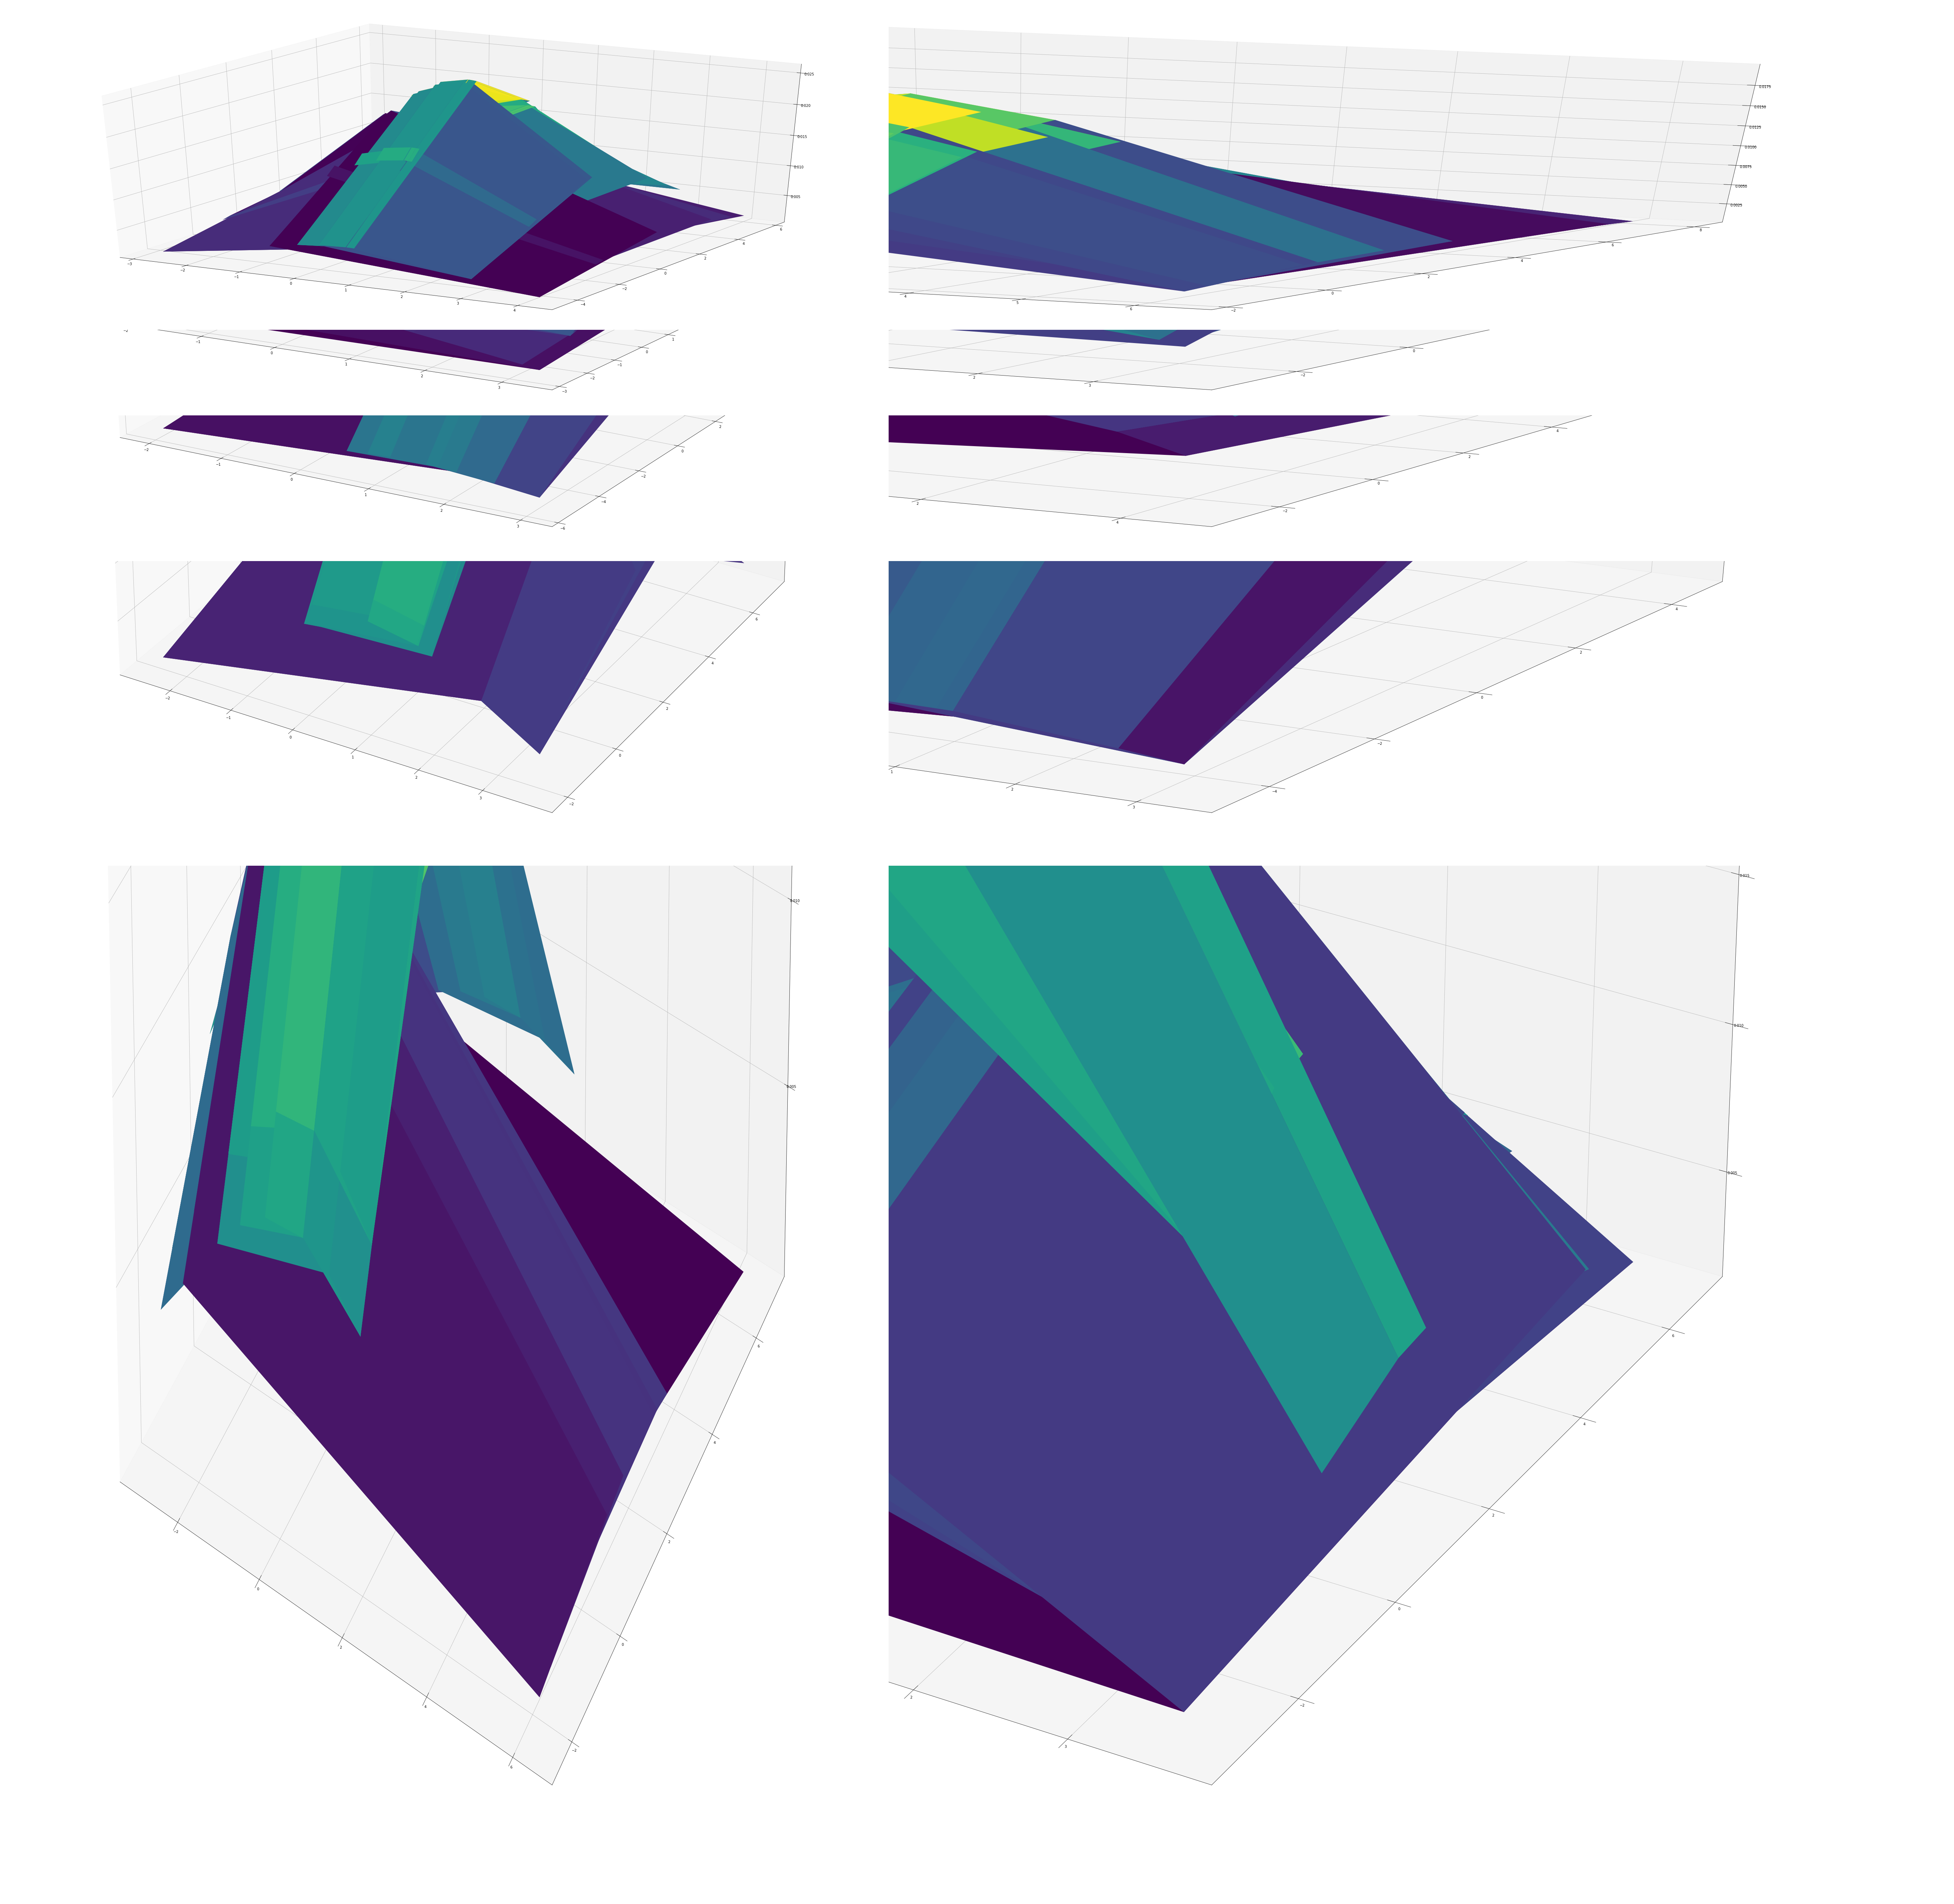

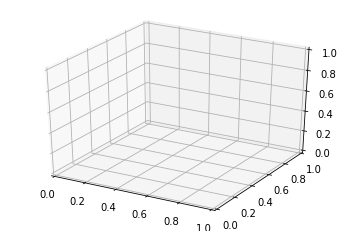

In [87]:
# matplotlib.rcParams.update({'font.serif': 'Times New Roman',
#                                 'font.size': 10.0,
#                                 'axes.labelsize': 'Medium',
#                                 'axes.labelweight': 'normal',
#                                 'axes.linewidth': 0.8,
#                                  ###########################################
#                                  # THIS IS THE IMPORTANT ONE FOR STRETCHING
#                                  # default is [6,4] but...i changed it to
#                                 'figure.figsize':[150,500]   # THIS ONE #
#                               })
    
def do_it_loop_2(loop_1,loop_N,axes,axes_col,axes_raw,fig):#,plt_my):
  mu = [1,2]
  cov = [[4,4],
         [4,9]]
  X = np.random.multivariate_normal(mu, cov, size=loop_N)
  X_mean = np.mean(X, axis=0)
  X_cov = np.cov(X, rowvar=0)
  X_diag = np.diag(X_cov)
  X_stddev = np.sqrt(X_diag)


  # Due to deprecated MultivariateNormalFullCovariance
  mvn = tfd.MultivariateNormalDiag(
  loc=X_mean,
  scale_diag=X_stddev)
  mvn_mean = mvn.mean().numpy()
  mvn_cov = mvn.covariance().numpy()
  mvn_stddev = mvn.stddev().numpy()

  # print ('\n\n Sample mean of X which has been made by random.multivariate_normal function is : \n\n'+str(mvn_mean))
  # print ('\n\n Sample Covariance of X is : \n\n'+str(mvn_cov))

  x1, x2 = np.meshgrid(X[:,0], X[:,1])
  data = np.stack((x1.flatten(), x2.flatten()), axis=1)
  prob = mvn.prob(data).numpy()
  ax = fig.add_subplot(axes_raw+1,axes_col+1,1, projection='3d')
  ax.plot_surface(x1, x2, prob.reshape(x1.shape), cmap='viridis')
  print (str(axes_raw)+','+str(axes_col))
  # axes[axes_raw,axes_col]=ax
  # plt.show()
  return axes

loop=10;
loop_N=[10]#[10,20,40]
np.random.seed(loop)  # random seed dont change  :https://stackoverflow.com/questions/3543833/how-do-i-clear-all-variables-in-the-middle-of-a-python-script
fig = plt.figure(figsize=(100, 100))
axs = plt.subplots(5,2)#, sharex=True, sharey=True)
axs = plt.axes(projection='3d')

print(' Repeat '+str(loop)+'  times \n')
mm=1
for j in loop_N:
  for i  in range(0,5):
    for k in range(0,2):
      
      # plt.subplot(5, 2, mm);
      # if mm<=9 :
        # mm=mm+1;
      # fig.suptitle('Plot for iteration of  '+str(i)+ ' time is :')


      # plt.subplots(5, 2)
      # fig, axs = fig.subplot(i,1)
      # fig.suptitle('Plot for iteration of  '+str(i)+ ' time is :')
      axs_new=do_it_loop_2(i,j,axs,k,i,fig)
      
      # plt.show()
      # fig = plt.figure()
    
# plt.tight_layout()
plt.savefig("plot.png")
plt.show() 

# # fig, ax_array = plt.subplots(nrows=2, ncols=2)
# axs_new = axs_new.flatten()
# plt.subplots(5, 2)
# mm=1
# # (2) Plot loop
# for i, ax in enumerate(axs_new):
#   # ax.plot(x , np.sin(x + np.pi/2*i))
#   plt.subplot(5, 2, mm);
#   if mm<=9 :
#         mm=mm+1;
#   ax.set_title(f'plot {i}')

# plt.suptitle('Plots')
# axes[0].legend()
# axes[-1].set_xlabel('Sample Value', fontsize=13)
# plt.savefig('finalplot')
# plt.show()


    #  axes = fig.subplots(nrows=3, ncols=4)
    #  axs=do_it_loop_2(i,j)
    #  plt.show()



# # (1) Prepare the figure infrastructure 
# fig, ax_array = plt.subplots(nrows=2, ncols=2)
# ax_array = ax_array.flatten()

# # (2) Plot loop
# for i, ax in enumerate(ax_array):
#   ax.plot(x , np.sin(x + np.pi/2*i))
#   #ax.set_title(f'plot {i}')


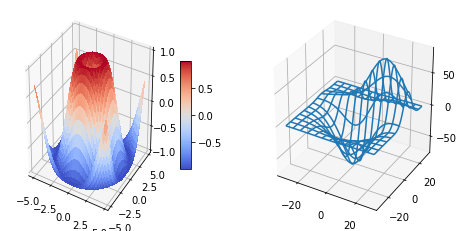

In [60]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt


# imports specific to the plots in this example
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

# Twice as wide as it is tall.
fig = plt.figure(figsize=plt.figaspect(0.5))

#---- First subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01)

fig.colorbar(surf, shrink=0.5, aspect=10)

#---- Second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()